In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import multivariate_normal
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
hospitalization2_df = pd.read_csv("hospitalization2.csv")
hospitalization2_df.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,unitName2,Admission_Medical_Record2,Admission_Entry_Date2,Release_Date2,סוג קבלה,מהיכן המטופל הגיע,Release_Type,רופא משחרר,ימי אשפוז,אבחנות בקבלה,אבחנות בשחרור,מחלקות מייעצות,ct
0,430047,5,4727327,2021-02-16 17:33:45.570,2021-02-19 12:40:00,5,4745943,2021-02-24 15:03:30.490,2021-02-25 12:38:00,דחוף,מביתו,שוחרר לביתו,11023.0,1,"5370 , 7872 , 78720","5370 , 7872 , 78720",NaN,0
1,447962,4,6084166,2022-08-07 13:27:58.780,2022-08-08 15:15:00,4,6137129,2022-09-01 04:20:51.617,2022-09-02 16:00:00,דחוף,מביתו,שוחרר לביתו,12517.0,1,78060,78060,ריפוי בעיסוק,0
2,214558,5,7164813,2023-10-27 07:34:41.013,2023-10-29 17:18:00,5,7172678,2023-10-30 17:58:09.730,2023-11-01 15:33:00,דחוף,מביתו,שוחרר לביתו,11887.0,2,5119,"5119 , 514",שירות דיאטה,0
3,71277,3,4295329,2020-07-29 17:00:56.863,2020-08-03 14:26:00,3,4354333,2020-08-30 04:25:30.670,2020-09-03 13:45:00,דחוף,מביתו,שוחרר לביתו,10525.0,4,"2859 , 7807","486 , 5990",".שרות לפיזיותרפיה , מערך אורתופדי",0
4,112016,1,5052676,2021-07-03 11:42:24.973,2021-07-05 17:34:00,1,5078317,2021-07-13 01:21:32.077,2021-07-15 11:48:00,דחוף,מביתו,שוחרר לביתו,6890.0,2,7865,7865,"קרדיולוגיה- יעוצים , שירות דיאטה",1


In [3]:
print(hospitalization2_df.shape)
print(hospitalization2_df.isna().sum())

(8917, 18)
Patient                         0
unitName1                       0
Admission_Medical_Record        0
Admission_Entry_Date            0
Release_Date                    0
unitName2                       0
Admission_Medical_Record2       0
Admission_Entry_Date2           0
Release_Date2                   0
סוג קבלה                       68
מהיכן המטופל הגיע               0
Release_Type                    0
רופא משחרר                     88
ימי אשפוז                       0
אבחנות בקבלה                  802
אבחנות בשחרור                 233
מחלקות מייעצות               4176
ct                              0
dtype: int64


We can see that there are now missing values in "Admission_Entry_Date2" and "Release_Date2". Thus, we can use the whole column in order to perform the time analysis on the data.

In [4]:
# Convert time cells to datatime pandas format for future processing

df_with_time = hospitalization2_df.copy()

df_with_time['Admission_Entry_Date2'] = pd.to_datetime(df_with_time['Admission_Entry_Date2'])
df_with_time['Release_Date2'] = pd.to_datetime(df_with_time['Release_Date2'])


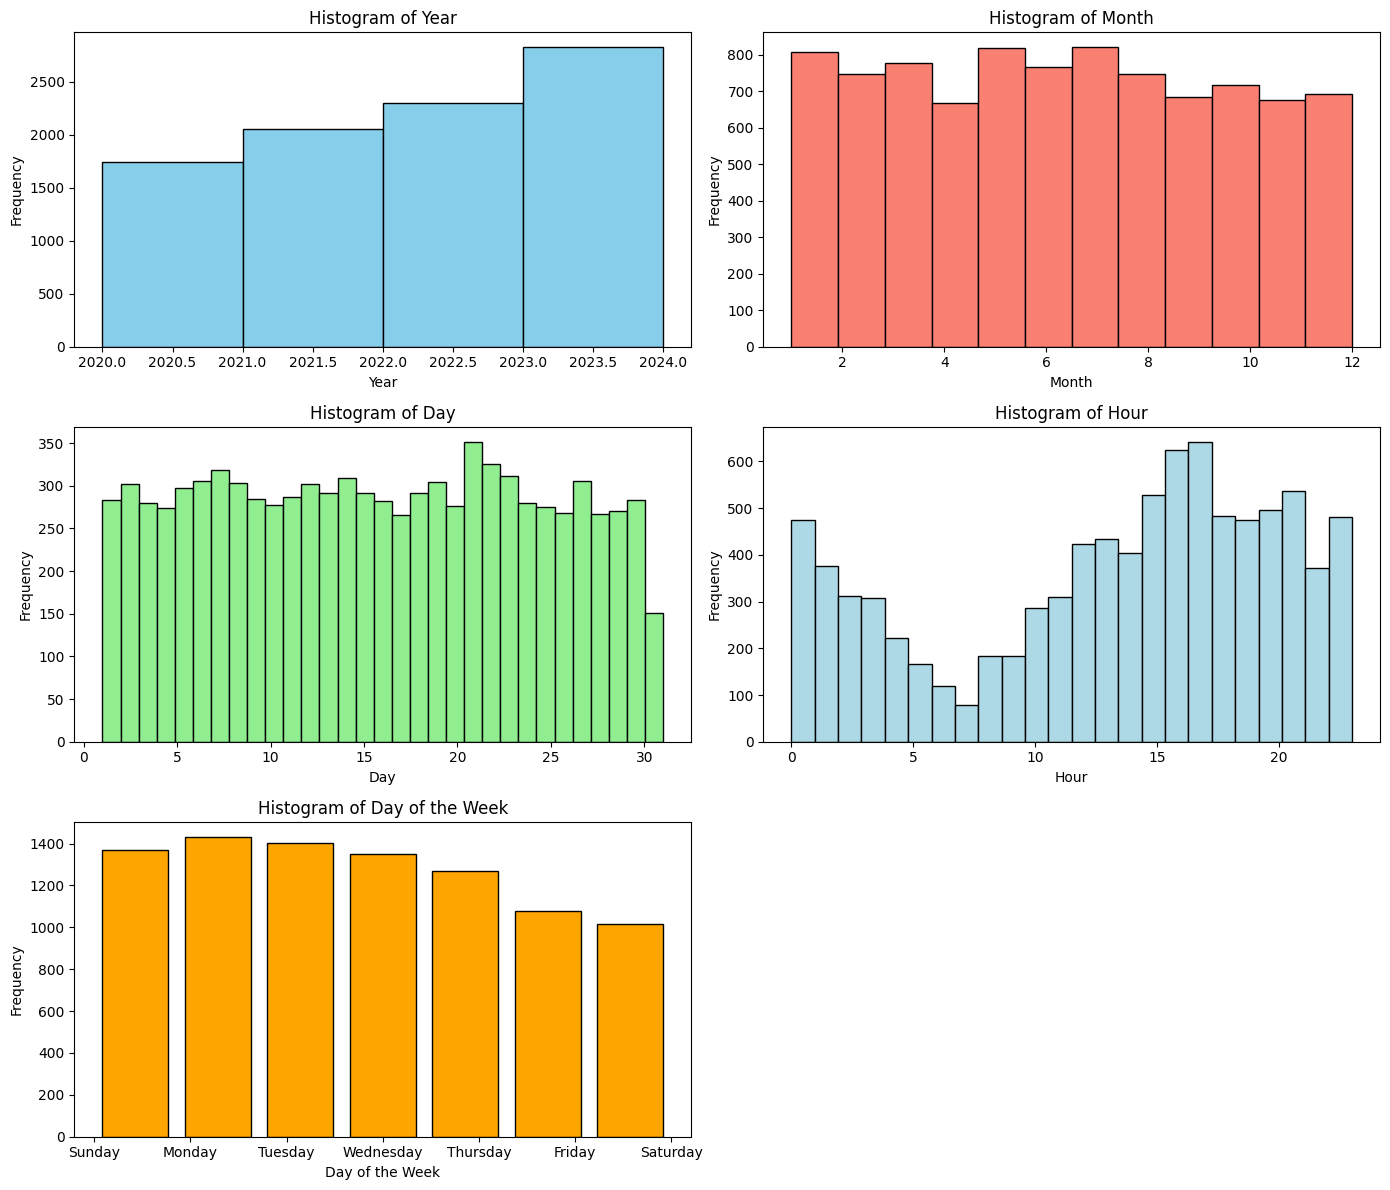

In [5]:

# Extract components from the datetime column
df_with_time['Year'] = df_with_time['Admission_Entry_Date2'].dt.year
df_with_time['Month'] = df_with_time['Admission_Entry_Date2'].dt.month
df_with_time['Day'] = df_with_time['Admission_Entry_Date2'].dt.day
df_with_time['Hour'] = df_with_time['Admission_Entry_Date2'].dt.hour
df_with_time['DayOfWeek'] = df_with_time['Admission_Entry_Date2'].dt.day_name()  # Get day of the week name

# Set DayOfWeek as a categorical variable with ordered days
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_with_time['DayOfWeek'] = pd.Categorical(df_with_time['DayOfWeek'], categories=days_order, ordered=True)

# Sort the dataframe by DayOfWeek categorical order (optional, not needed for hist)
df_with_time.sort_values('DayOfWeek', inplace=True)

# Create subplots to plot the histograms
fig, ax = plt.subplots(3, 2, figsize=(14, 12))  # Adjusted for 5 subplots

# Histogram for Year
# ax[0, 0].hist(df_with_time['Year'], bins=len(df_with_time['Year'].unique()), color='skyblue', edgecolor='black')
ax[0, 0].hist(df_with_time['Year'], bins=4, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Histogram of Year')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Frequency')

# Histogram for Month
ax[0, 1].hist(df_with_time['Month'], bins=12, color='salmon', edgecolor='black')
ax[0, 1].set_title('Histogram of Month')
ax[0, 1].set_xlabel('Month')
ax[0, 1].set_ylabel('Frequency')

# Histogram for Day
ax[1, 0].hist(df_with_time['Day'], bins=31, color='lightgreen', edgecolor='black')
ax[1, 0].set_title('Histogram of Day')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Frequency')

# Histogram for Hour
ax[1, 1].hist(df_with_time['Hour'], bins=24, color='lightblue', edgecolor='black')
ax[1, 1].set_title('Histogram of Hour')
ax[1, 1].set_xlabel('Hour')
ax[1, 1].set_ylabel('Frequency')

# Histogram for Day of the Week (in order)
ax[2, 0].hist(df_with_time['DayOfWeek'], bins=7, color='orange', edgecolor='black', rwidth=0.8)
ax[2, 0].set_title('Histogram of Day of the Week')
ax[2, 0].set_xlabel('Day of the Week')
ax[2, 0].set_ylabel('Frequency')

# Hide the empty subplot (2, 1)
ax[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



The re-hospitalization rates appear to be fairly uniform across the months of the year and throughout the days of each month. However, significant variations are observed in relation to the "Year," "Hour," and "Week." Notably, the number of re-hospitalizations shows an approximately linear increase year over year. Therefore, my focus will be on examining the relationship between the day of the week and the time of day. This analysis will consider that re-hospitalization rates are distributed relatively evenly across months and days, while the overall frequency of re-hospitalizations is expected to rise each year.

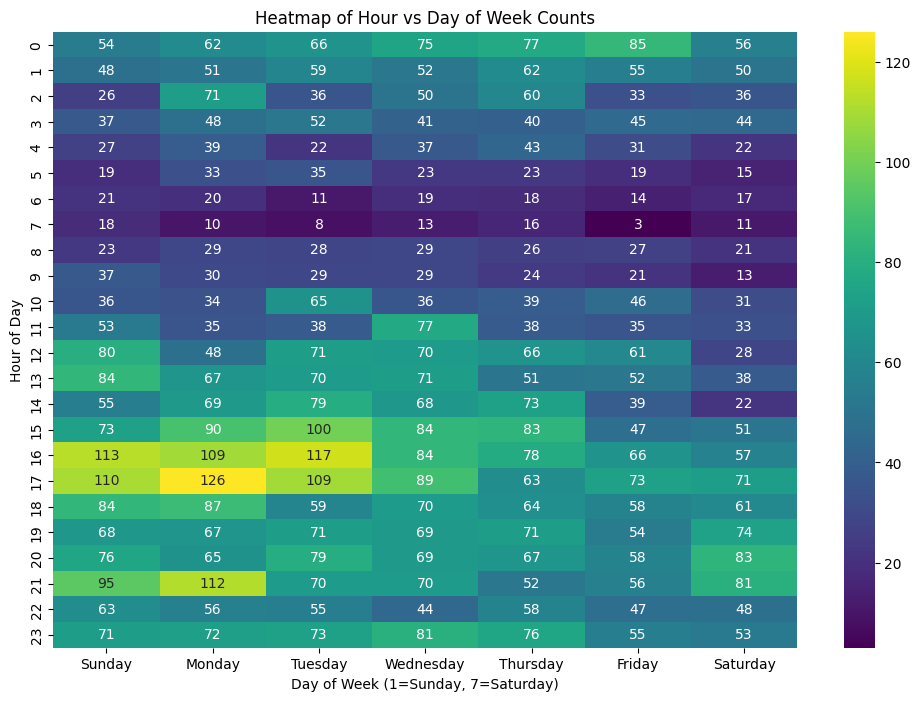

In [6]:

# Step 1: Count occurrences for each combination of 'Hour' and 'DayOfWeek'
count_data = df_with_time.groupby(['Hour', 'DayOfWeek']).size().unstack(fill_value=0)

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(count_data, cmap='viridis', annot=True, fmt='d')

# Labels for axes
plt.xlabel('Day of Week (1=Sunday, 7=Saturday)')
plt.ylabel('Hour of Day')
plt.title('Heatmap of Hour vs Day of Week Counts')

plt.show()


Mean: [4.0, 11.5]
Covariance Matrix: 
[[ 4.0239521   0.        ]
 [ 0.         48.20359281]]
Mean Squared Error (MSE): 3429.5896785991317
Root Mean Squared Error (RMSE): 58.56269869634708


C:\Users\97254\AppData\Local\Temp\ipykernel_26772\3455193566.py:42: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  comparison_df = pd.merge(count_data, predicted_counts_df, on=['Hour', 'DayOfWeek'], how='left')


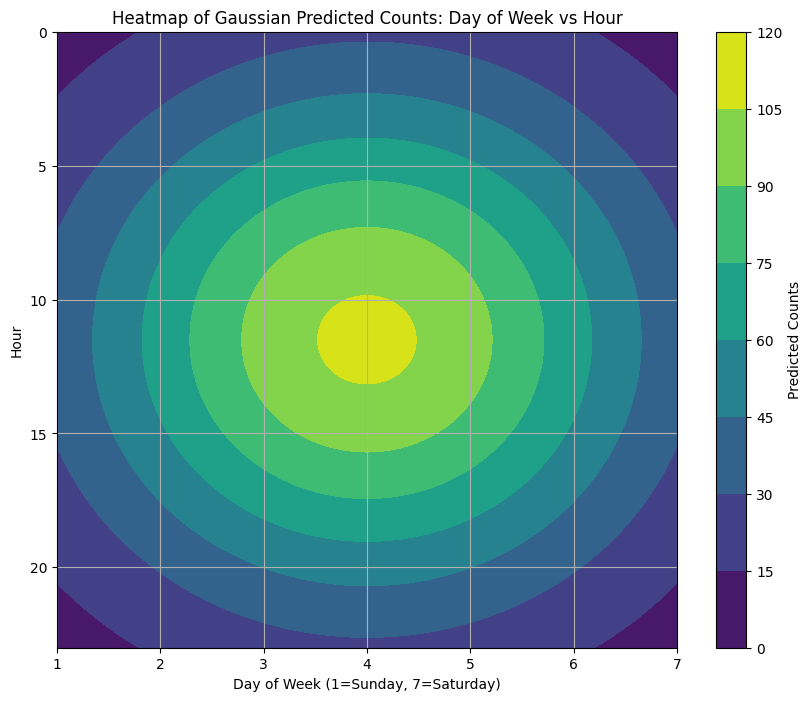

In [7]:


# Assuming df_with_time is your original DataFrame
df_3d = df_with_time.copy()

# Step 1: Map 'DayOfWeek' to numbers and ensure it's treated as a numeric type
df_3d['DayOfWeek'] = df_3d['DayOfWeek'].map({
    'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4,
    'Thursday': 5, 'Friday': 6, 'Saturday': 7
}).astype(int)

# Step 2: Create the 'Count' column by grouping and counting occurrences
count_data = df_3d.groupby(['Hour', 'DayOfWeek']).size().reset_index(name='Count')

# Step 3: Calculate mean and covariance matrix
mean = [count_data['DayOfWeek'].mean(), count_data['Hour'].mean()]
cov = np.cov(count_data['DayOfWeek'], count_data['Hour'])  # Covariance matrix


print(f"Mean: {mean}")
print(f"Covariance Matrix: \n{cov}")


# Step 4: Generate a grid of points for the heatmap
x = np.linspace(count_data['DayOfWeek'].min(), count_data['DayOfWeek'].max(), 500)  # More points for DayOfWeek axis
y = np.linspace(count_data['Hour'].min(), count_data['Hour'].max(), 100)
X, Y = np.meshgrid(x, y)

# Step 5: Create a bivariate normal distribution
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, cov)

# Step 6: Calculate the Z values (Gaussian values for each point on the grid)
Z = rv.pdf(pos)

# Estimate scaling factor based on the mean counts in your data
scaling_factor = count_data['Count'].mean() / Z.mean()
Z_counts = Z * scaling_factor

# Create a DataFrame for predicted counts on the grid
predicted_counts_df = pd.DataFrame({'Hour': Y.flatten(), 'DayOfWeek': X.flatten(), 'PredictedCount': Z_counts.flatten()})

# Merge predicted counts with actual counts data
comparison_df = pd.merge(count_data, predicted_counts_df, on=['Hour', 'DayOfWeek'], how='left')

# Fill NaN values in 'PredictedCount' with 0 (for grid points with no actual counts)
comparison_df['PredictedCount'].fillna(0, inplace=True)

# Calculate MSE and RMSE
mse = mean_squared_error(comparison_df['Count'], comparison_df['PredictedCount'])
rmse = sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the heatmap with predicted counts
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z_counts, cmap='viridis')
plt.colorbar(label='Predicted Counts')

# Invert the y-axis so that 0 is on top
plt.gca().invert_yaxis()

# Add labels
plt.xlabel('Day of Week (1=Sunday, 7=Saturday)')
plt.ylabel('Hour')
plt.title('Heatmap of Gaussian Predicted Counts: Day of Week vs Hour')

# Add grid
plt.grid(True)

plt.show()


We observed that the Multivariate Gaussian distribution does not fit the data well; it appears shifted towards the middle of the week and earlier in the day. However, the heatmap clearly shows that most rehospitalizations occur at the beginning of the week around 17:00.

To improve the fit, we will try using the Poisson distribution with polynomial features to provide the model with more flexibility.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                  168
Model:                            GLM   Df Residuals:                      153
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -756.93
Date:                Sun, 08 Sep 2024   Deviance:                       561.54
Time:                        21:03:19   Pearson chi2:                     555.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2473      0.252     16.835      0.0

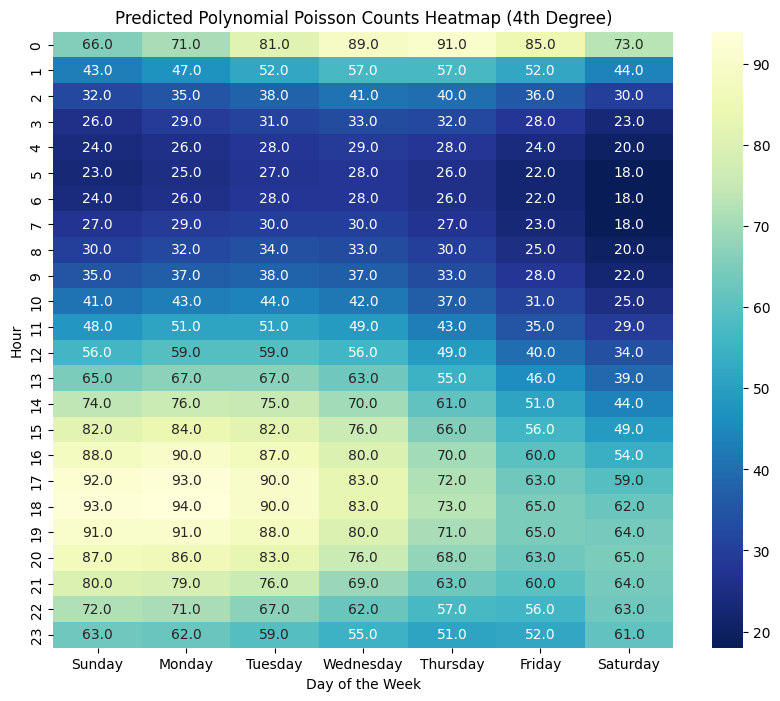

In [8]:
# Group by Hour and DayOfWeek to compute the counts
data = df_3d.groupby(['Hour', 'DayOfWeek']).size().reset_index(name='Count')

# from sklearn.preprocessing import PolynomialFeatures
# import statsmodels.api as sm

# Independent variables (Hour and DayOfWeek)
X = data[['Hour', 'DayOfWeek']]

# Create polynomial features up to 4th degree
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# Add a constant term for the intercept
X_poly = sm.add_constant(X_poly)

# Dependent variable (Count)
y = data['Count']

# Fit the Poisson regression model with the polynomial features
poisson_poly_model = sm.GLM(y, X_poly, family=sm.families.Poisson()).fit()

# Summary of the model
print(poisson_poly_model.summary())

# Create a grid of Hour and DayOfWeek values for predictions
hours = np.arange(0, 24)
days = np.arange(1, 8)
prediction_grid = pd.DataFrame([(h, d) for h in hours for d in days], columns=['Hour', 'DayOfWeek'])

# Generate polynomial features for the grid
X_grid_poly = poly.transform(prediction_grid)

# Add a constant term for predictions
X_grid_poly = sm.add_constant(X_grid_poly)

# Predict the counts using the fitted polynomial model
predicted_counts = poisson_poly_model.predict(X_grid_poly)
predicted_counts = predicted_counts.astype(int)
# Reshape predicted counts into a grid for heatmap plotting
predicted_counts_grid = predicted_counts.reshape(len(hours), len(days))  # No .values needed


# Plot the heatmap with reversed color scale
plt.figure(figsize=(10, 8))
sns.heatmap(predicted_counts_grid, annot=True, fmt='.1f', 
            xticklabels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
            yticklabels=hours, cmap="YlGnBu_r")  

plt.title('Predicted Polynomial Poisson Counts Heatmap (4th Degree)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.show()



In [9]:

mse = mean_squared_error(y, poisson_poly_model.fittedvalues)
mse = round(mse, 1)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
rmse = round(rmse, 1)

print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 166.0
Root Mean Squared Error: 12.9


We can see that the poisson distribution fitted the data much more accuretly and can predict the relative volume of re-admission patients over each day and time of the day. 

### Conclusions from task 31

* The re-hospitalization rates appear to be fairly uniform across the months of the year and throughout the days of each month.

*  The number of re-hospitalizations shows an approximately linear increase year over year. 

* The "Hour" and "Day of Week" variables exhibit notable variations throughout their respective intervals.

* The Poisson model proved to be reasonably reliable in predicting the relative volume of re-hospitalized patients across different days of the week and times of the day.
